In [1]:
#part0 load data
import pandas as pd
from collections import Counter
import numpy as np
from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

census_column_names=['age','workclass','fnlwgt','education','education-num',
                      'marital-status','occupation','relationship','race','sex',
                      'capital-gain','capital-loss','hours-per-week','native-country',
                      'annual-income']
CENSUS_FILE = './census_dataset.csv'
org_dataFile = pd.read_csv(CENSUS_FILE,names=census_column_names)

#number of features & type of features
org_dataFile.info()

#Classes and their prevalence
print(org_dataFile['annual-income'].value_counts())
print(org_dataFile['annual-income'].value_counts()/len(org_dataFile))

print("Not balanced")

#preprocess string features        
def labelizedString(df2):
    le = preprocessing.LabelEncoder()
    for column_name in df2.columns:
        if df2[column_name].dtype == object:
            df2[column_name] = le.fit_transform(df2[column_name])
        else:
            pass
dataFile = org_dataFile.copy()
labelizedString(dataFile)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27482 entries, 0 to 27481
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             27482 non-null  int64 
 1   workclass       27482 non-null  object
 2   fnlwgt          27482 non-null  int64 
 3   education       27482 non-null  object
 4   education-num   27482 non-null  int64 
 5   marital-status  27482 non-null  object
 6   occupation      27482 non-null  object
 7   relationship    27482 non-null  object
 8   race            27482 non-null  object
 9   sex             27482 non-null  object
 10  capital-gain    27482 non-null  int64 
 11  capital-loss    27482 non-null  int64 
 12  hours-per-week  27482 non-null  int64 
 13  native-country  27482 non-null  object
 14  annual-income   27482 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.1+ MB
<=50K    19915
>50K      7567
Name: annual-income, dtype: int64
<=50K    0.724656
>50K     0.

In [2]:
#part0(2)
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer

def MySplit(n_splits,test_size,df):
  split = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=23721266)
  for train_index, test_valid_index in split.split(df, df['annual-income']):
     set1 = df.iloc[train_index]
     set2 = df.iloc[test_valid_index]
     return set1,set2

# stratified split 60%/20%/20% 
train_set,test_valid_set = MySplit(1,0.4,dataFile)
test_set,valid_set = MySplit(1,0.5,test_valid_set)
  
#same prevalence verify
print(train_set['annual-income'].value_counts()/len(train_set))
print(test_set['annual-income'].value_counts()/len(test_set))

def myStd(df):
    ss = preprocessing.StandardScaler()
    annualIncome = df.loc[:,'annual-income']
    tempDf = df.drop('annual-income', axis = 1)
    df_scaled = pd.DataFrame(ss.fit_transform(tempDf),columns = tempDf.columns, index=tempDf.index)
    df_scaled['annual-income'] = annualIncome
    return df_scaled  


#train_set.head()
std_train_set = myStd(train_set)
std_test_set = myStd(test_set)
std_valid_set = myStd(valid_set)
#std_train_set.head()

0    0.724665
1    0.275335
Name: annual-income, dtype: float64
0    0.724709
1    0.275291
Name: annual-income, dtype: float64


In [3]:
#part 1
#peformance metric functions
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import svm 

#separate features and labels
X_train = train_set.drop('annual-income',axis=1)
Y_train = train_set['annual-income']
X_test = test_set.drop('annual-income',axis=1)
Y_test = test_set['annual-income']


#naive_bayes model 
print("naive_bayes")
gnb = GaussianNB()
Y_pred_train = gnb.fit(X_train,Y_train).predict(X_train)
accuracy_score(Y_train,Y_pred_train)

Y_pred_test = gnb.predict(X_test)
accuracy_score(Y_test,Y_pred_test)

gnb_cm = confusion_matrix(Y_test,Y_pred_test)
disp=ConfusionMatrixDisplay(confusion_matrix=gnb_cm,
                            display_labels=gnb.classes_)
#disp.plot()
#plt.show()



naive_bayes


0.7652374310146158

0.7581877729257642

In [4]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
print("Random Forest:")
rf = RandomForestClassifier(random_state=23721266)
rf_Y_pred_train = rf.fit(X_train,Y_train).predict(X_train)
accuracy_score(Y_train,rf_Y_pred_train)

rf_Y_pred_test = rf.predict(X_test)
accuracy_score(Y_test,rf_Y_pred_test)

rf_cm = confusion_matrix(Y_test,rf_Y_pred_test)
rf_disp=ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                            display_labels=rf.classes_)
#rf_disp.plot()
#plt.show()


Random Forest:


0.9999393535083996

0.8531659388646288

In [5]:
#Support Vector Machine (SVM)
print("SVM:")
std_X_train = std_train_set.drop('annual-income',axis=1)
std_Y_train = std_train_set['annual-income']
std_X_test = std_test_set.drop('annual-income',axis=1)
std_Y_test = std_test_set['annual-income']

svc_model = svm.SVC()
svc_model.fit(std_X_train,std_Y_train)
svc_Y_pred_train = svc_model.predict(std_X_train)
accuracy_score(std_Y_train,svc_Y_pred_train)

svc_Y_pred_test = svc_model.predict(std_X_test)
accuracy_score(std_Y_test,svc_Y_pred_test)

svc_cm = confusion_matrix(std_Y_test,svc_Y_pred_test)
svc_disp =ConfusionMatrixDisplay(confusion_matrix=svc_cm,
                            display_labels=svc_model.classes_)
#svc_disp.plot()
#plt.show()


SVM:


SVC()

0.8535387227848868

0.8402474526928675

naive_bayes
auc: 0.6221626475664009
f1: 0.41605068637803594
accuracy: 0.7652374310146158
sensitivity: 0.3037444933920705
specificity: 0.9405808017407314
precision: 0.6601244614648157


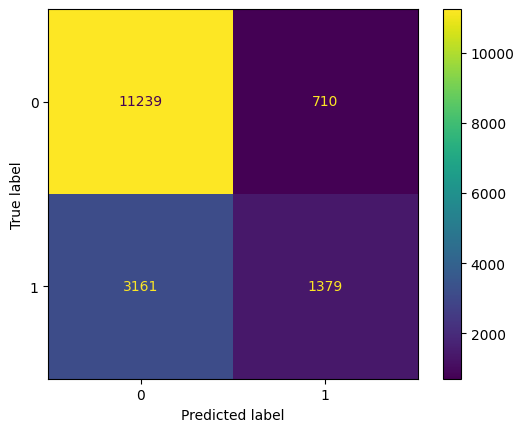

SVM
auc: 0.7909827394178565
f1: 0.7101884075363015
accuracy: 0.8535387227848868
sensitivity: 0.6517621145374449
specificity: 0.9302033642982677
precision: 0.780121276034801


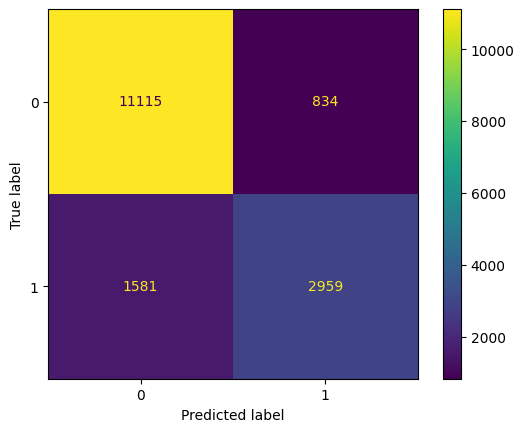

Random forest
auc: 0.9998898678414097
f1: 0.9998898557109814
accuracy: 0.9999393535083996
sensitivity: 0.9997797356828194
specificity: 1.0
precision: 1.0


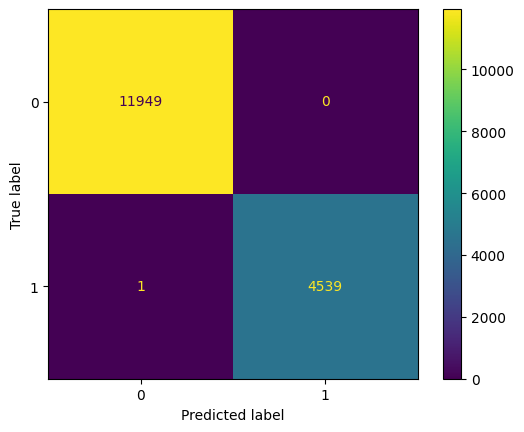

In [6]:
#part1 (2)

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['auc','f1','accuracy','sensitivity','specificity', 'precision']


#Calculate the confusion matrix and report the following performance metrics
def p1_metrics(y_true,y_pred,include_cm=True):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    if include_cm:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp),
            'confusion_matrix': cm}
    else:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp)}

def outputP1_metrics(m,modelName):
    print(modelName)
    for i in m:
        if i != 'confusion_matrix':
            print(str(i) +": "+ str(m[i]))
        else:
            disp = ConfusionMatrixDisplay(confusion_matrix=m[i],
                            display_labels=gnb.classes_)
            disp.plot()
            plt.show()

            
NBperformance = p1_metrics(Y_train,Y_pred_train)
SVMperformance = p1_metrics(std_Y_train,svc_Y_pred_train)
RFperformance = p1_metrics(Y_train,rf_Y_pred_train)
outputP1_metrics(NBperformance,"naive_bayes")
outputP1_metrics(SVMperformance,"SVM")
outputP1_metrics(RFperformance,"Random forest")


naive_bayes
auc: 0.6372647656105158
f1: 0.4453551912568306
accuracy: 0.7784245952337638
sensitivity: 0.3229854689564069
specificity: 0.9515440622646246
precision: 0.717008797653959


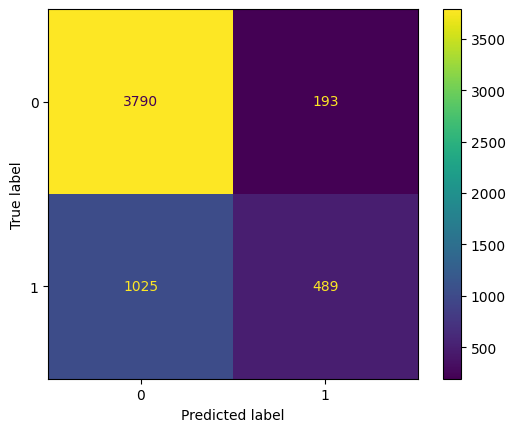

SVM
auc: 0.7777161257670065
f1: 0.6892086330935252
accuracy: 0.8428233581953793
sensitivity: 0.6327608982826949
specificity: 0.9226713532513181
precision: 0.7567140600315956


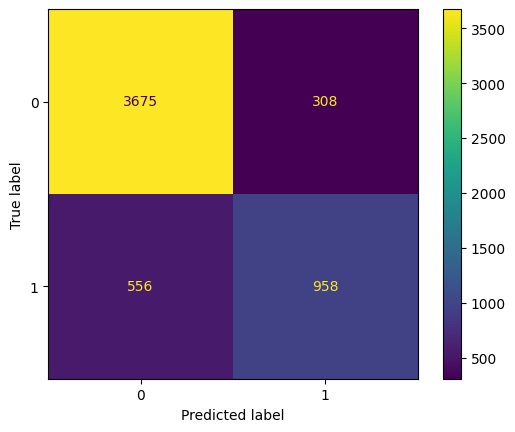

Random forest
auc: 0.7977088723508199
f1: 0.7157821229050279
accuracy: 0.8519192286701838
sensitivity: 0.6770145310435931
specificity: 0.9184032136580467
precision: 0.7592592592592593


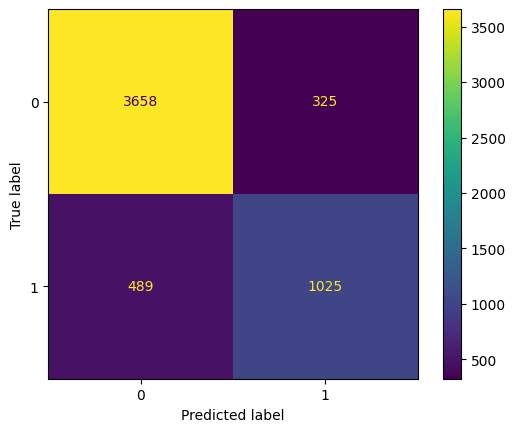

In [7]:
#part 1(3) 

X_valid = valid_set.drop('annual-income',axis=1)
Y_valid = valid_set['annual-income']
std_X_valid = std_valid_set.drop('annual-income',axis=1) 
std_Y_valid = std_valid_set['annual-income']

#NB
Y_pred_valid = gnb.predict(X_valid)
gnb_validP1 = p1_metrics(Y_valid,Y_pred_valid)
outputP1_metrics(gnb_validP1,"naive_bayes")

#SVM
SVC_Y_pred_valid = svc_model.predict(std_X_valid)
SVM_validP1 = p1_metrics(std_Y_valid,SVC_Y_pred_valid)
outputP1_metrics(SVM_validP1,"SVM")

#RF
RF_Y_pred_valid = rf.predict(X_valid)
RF_validP1 = p1_metrics(Y_valid,RF_Y_pred_valid)
outputP1_metrics(RF_validP1,"Random forest")


In [8]:
#part 2
from sklearn.model_selection import StratifiedKFold

mergeDataSet = pd.concat([train_set, valid_set])
XmergeDataSet = mergeDataSet.drop('annual-income',axis=1)
YmergeDataSet = mergeDataSet['annual-income']

std_mergeDataSet = pd.concat([std_train_set,std_valid_set])
std_XmergeDataSet = std_mergeDataSet.drop('annual-income',axis=1)
std_YmergeDataSet = std_mergeDataSet['annual-income']

skf = StratifiedKFold(n_splits=5,random_state=23721266,shuffle=True)
NBscores = []
svc_modelscores = []
rfscores = []

#model reset 
gnb2 = GaussianNB()
svc_model2 = svm.SVC()
rf2 = RandomForestClassifier(random_state=23721266)    

def p1_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p1_metrics(y_true,y_pred,include_cm=False)

def StratifiedKFoldTraining(model,matrixlist,X,Y):
  for train_index, test_index in skf.split(X,Y):
    this_X_train, this_X_test = X.iloc[train_index], X.iloc[test_index]
    this_y_train, this_y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(this_X_train, this_y_train)
    matrixlist.append(p1_metrics_scorer(model,this_X_test, this_y_test))
    #print(model.score(this_X_test, this_y_test))

StratifiedKFoldTraining(gnb2,NBscores,XmergeDataSet,YmergeDataSet)
StratifiedKFoldTraining(svc_model2,svc_modelscores,std_XmergeDataSet,std_YmergeDataSet)
StratifiedKFoldTraining(rf2,rfscores,XmergeDataSet,YmergeDataSet)

In [9]:
#part 2(2,3)
def collate_cv_results(cv_results,display=True):
    cv_stats=dict()
    for k in cv_results:
        cv_stats[k+"_mean"]=np.mean(cv_results[k])
        cv_stats[k+"_std"]=np.std(cv_results[k])
        if display:
            print(k,cv_stats[k+"_mean"],"("+str(cv_stats[k+"_std"])+")")
    return cv_stats

collate_cv_results(pd.json_normalize(NBscores))
collate_cv_results(pd.json_normalize(svc_modelscores))
collate_cv_results(pd.json_normalize(rfscores))

auc 0.6279052367725227 (0.0048893978163539785)
f1 0.4263203685422635 (0.010936495256538678)
accuracy 0.771308799883504 (0.0026138716572843552)
sensitivity 0.3087226593690072 (0.010867863042942748)
specificity 0.947087814176038 (0.002692817194564521)
precision 0.6892221458324321 (0.009437639766481104)


{'auc_mean': 0.6279052367725227,
 'auc_std': 0.0048893978163539785,
 'f1_mean': 0.4263203685422635,
 'f1_std': 0.010936495256538678,
 'accuracy_mean': 0.771308799883504,
 'accuracy_std': 0.0026138716572843552,
 'sensitivity_mean': 0.3087226593690072,
 'sensitivity_std': 0.010867863042942748,
 'specificity_mean': 0.947087814176038,
 'specificity_std': 0.002692817194564521,
 'precision_mean': 0.6892221458324321,
 'precision_std': 0.009437639766481104}

auc 0.7711424486537969 (0.00927498727439582)
f1 0.6807681219991071 (0.013411342354378636)
accuracy 0.8413081059132985 (0.005012455558750647)
sensitivity 0.61496857320294 (0.02089436000649203)
specificity 0.9273163241046538 (0.005627663884199774)
precision 0.762984447147336 (0.011790474579901605)


{'auc_mean': 0.7711424486537969,
 'auc_std': 0.00927498727439582,
 'f1_mean': 0.6807681219991071,
 'f1_std': 0.013411342354378636,
 'accuracy_mean': 0.8413081059132985,
 'accuracy_std': 0.005012455558750647,
 'sensitivity_mean': 0.61496857320294,
 'sensitivity_std': 0.02089436000649203,
 'specificity_mean': 0.9273163241046538,
 'specificity_std': 0.005627663884199774,
 'precision_mean': 0.762984447147336,
 'precision_std': 0.011790474579901605}

auc 0.8027650602854944 (0.0053352480337510375)
f1 0.7239236208501806 (0.006050165571467095)
accuracy 0.8566359944246578 (0.001672696318607229)
sensitivity 0.6828583712661486 (0.014171006012683325)
specificity 0.9226717493048403 (0.00386922500870025)
precision 0.7705412120643202 (0.00564001939209194)


{'auc_mean': 0.8027650602854944,
 'auc_std': 0.0053352480337510375,
 'f1_mean': 0.7239236208501806,
 'f1_std': 0.006050165571467095,
 'accuracy_mean': 0.8566359944246578,
 'accuracy_std': 0.001672696318607229,
 'sensitivity_mean': 0.6828583712661486,
 'sensitivity_std': 0.014171006012683325,
 'specificity_mean': 0.9226717493048403,
 'specificity_std': 0.00386922500870025,
 'precision_mean': 0.7705412120643202,
 'precision_std': 0.00564001939209194}

In [10]:
#part 3
import time
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5,10,20],'gamma':('auto','scale')}
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5]}
svc_model3 = svm.SVC() 
clf = GridSearchCV(svc_model3, parameters,refit="auc",scoring=p1_metrics_scorer,cv=skf,n_jobs=-1,return_train_score=False,)
time_start = time.time()
clf.fit(std_XmergeDataSet,std_YmergeDataSet) 
time_end = time.time()
time_c = time_end-time_start
print(clf.best_params_)
print(time_c)
#clf.fit(X_test,Y_test)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23721266, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'rbf')},
             refit='auc',
             scoring=<function p1_metrics_scorer at 0x0000025611EF6310>)

{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}
490.9274740219116


In [11]:
#part 3 (2)
best_svc_modelscores = []
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats
collate_ht_results(clf,display=True)

test_auc 0.7824356369760196 (0.005297042549760699)
test_f1 0.6923018487779972 (0.007309671037058931)
test_accuracy 0.8397164836953717 (0.003617568672213127)
test_sensitivity 0.6549408657553691 (0.012518047120553915)
test_specificity 0.90993040819667 (0.0055671918787411805)
test_precision 0.7344678138641594 (0.010510034749333461)


{'auc_mean': 0.7824356369760196,
 'auc_std': 0.005297042549760699,
 'f1_mean': 0.6923018487779972,
 'f1_std': 0.007309671037058931,
 'accuracy_mean': 0.8397164836953717,
 'accuracy_std': 0.003617568672213127,
 'sensitivity_mean': 0.6549408657553691,
 'sensitivity_std': 0.012518047120553915,
 'specificity_mean': 0.90993040819667,
 'specificity_std': 0.0055671918787411805,
 'precision_mean': 0.7344678138641594,
 'precision_std': 0.010510034749333461}

In [12]:
#part 3(3)
from sklearn.model_selection import RandomizedSearchCV
numbers = [1]
numbers.extend(np.arange(5,105,5))
Rparameters = {'kernel':('linear', 'rbf'), 'C':numbers,'gamma':('auto','scale')}
Rclf = RandomizedSearchCV(svc_model3, Rparameters, random_state=23721266,refit="auc",scoring=p1_metrics_scorer,cv=skf,n_jobs=-1,return_train_score=False,n_iter=16)
time_start = time.time()
Rclf.fit(std_XmergeDataSet,std_YmergeDataSet) 
time_end = time.time()
time_c = time_end-time_start
print(Rclf.best_params_)
print(time_c)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23721266, shuffle=True),
                   estimator=SVC(), n_iter=16, n_jobs=-1,
                   param_distributions={'C': [1, 5, 10, 15, 20, 25, 30, 35, 40,
                                              45, 50, 55, 60, 65, 70, 75, 80,
                                              85, 90, 95, 100],
                                        'gamma': ('auto', 'scale'),
                                        'kernel': ('linear', 'rbf')},
                   random_state=23721266, refit='auc',
                   scoring=<function p1_metrics_scorer at 0x0000025611EF6310>)

{'kernel': 'rbf', 'gamma': 'scale', 'C': 40}
1506.816116809845


In [13]:
#part 3(4)
collate_ht_results(Rclf)

test_auc 0.7825493108717083 (0.005564111771277177)
test_f1 0.6907662683396044 (0.007183745910767018)
test_accuracy 0.8369874225915537 (0.003099479536816637)
test_sensitivity 0.6613822331110824 (0.013933040749587504)
test_specificity 0.9037163886323343 (0.005242035543149725)
test_precision 0.7231795985412075 (0.0087970078153872)


{'auc_mean': 0.7825493108717083,
 'auc_std': 0.005564111771277177,
 'f1_mean': 0.6907662683396044,
 'f1_std': 0.007183745910767018,
 'accuracy_mean': 0.8369874225915537,
 'accuracy_std': 0.003099479536816637,
 'sensitivity_mean': 0.6613822331110824,
 'sensitivity_std': 0.013933040749587504,
 'specificity_mean': 0.9037163886323343,
 'specificity_std': 0.005242035543149725,
 'precision_mean': 0.7231795985412075,
 'precision_std': 0.0087970078153872}

In [14]:
#Part 4
import math
from sklearn.model_selection import RandomizedSearchCV
rf4 = RandomForestClassifier(random_state=23721266)
numOt = np.arange(10,101,10)
depth = round(math.log2(len(mergeDataSet.index)))
print(depth)
rfparameters = {'criterion':('gini','entropy'),'max_depth':(None,depth),'n_estimators':numOt}
Rclf = RandomizedSearchCV(rf, rfparameters, random_state=23721266,refit="auc",scoring=p1_metrics_scorer,cv=skf,n_jobs=-1,return_train_score=False,n_iter=16)
time_start = time.time()
Rclf.fit(XmergeDataSet,YmergeDataSet) 
time_end = time.time()
time_c = time_end-time_start
print(Rclf.best_params_)



14


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23721266, shuffle=True),
                   estimator=RandomForestClassifier(random_state=23721266),
                   n_iter=16, n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (None, 14),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=23721266, refit='auc',
                   scoring=<function p1_metrics_scorer at 0x0000025611EF6310>)

{'n_estimators': 90, 'max_depth': 14, 'criterion': 'gini'}


In [15]:
#part 4 (2)
collate_ht_results(Rclf)

test_auc 0.8038935679417227 (0.00806058856436609)
test_f1 0.7287695471228453 (0.010293882533767108)
test_accuracy 0.8616846638686534 (0.0036501539971853037)
test_sensitivity 0.6752613440159421 (0.018091321356186085)
test_specificity 0.9325257918675032 (0.002363277960267141)
test_precision 0.7918141492556022 (0.003074598476943)


{'auc_mean': 0.8038935679417227,
 'auc_std': 0.00806058856436609,
 'f1_mean': 0.7287695471228453,
 'f1_std': 0.010293882533767108,
 'accuracy_mean': 0.8616846638686534,
 'accuracy_std': 0.0036501539971853037,
 'sensitivity_mean': 0.6752613440159421,
 'sensitivity_std': 0.018091321356186085,
 'specificity_mean': 0.9325257918675032,
 'specificity_std': 0.002363277960267141,
 'precision_mean': 0.7918141492556022,
 'precision_std': 0.003074598476943}

In [16]:
#part 5 (1)
def toDict(list,cols):
    cols = cols.tolist()
    temp = dict()
    for val in list:
        temp[cols.pop(0)] = val       
    return temp

feature_selection, Ftraining = MySplit(1,5/6,train_set)
Xfeature_selection = feature_selection.drop('annual-income',axis=1)
Yfeature_selection = feature_selection['annual-income']
forest = RandomForestClassifier(random_state=23721266)
forest.fit(Xfeature_selection, Yfeature_selection)
importances = forest.feature_importances_
bardata = toDict(importances,Xfeature_selection.columns)
bardata = dict(sorted(bardata.items(), key=lambda item: item[1],reverse= True))
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

RandomForestClassifier(random_state=23721266)

<AxesSubplot:>

Text(0.5, 1.0, 'Feature importances')

Text(0, 0.5, 'Mean')

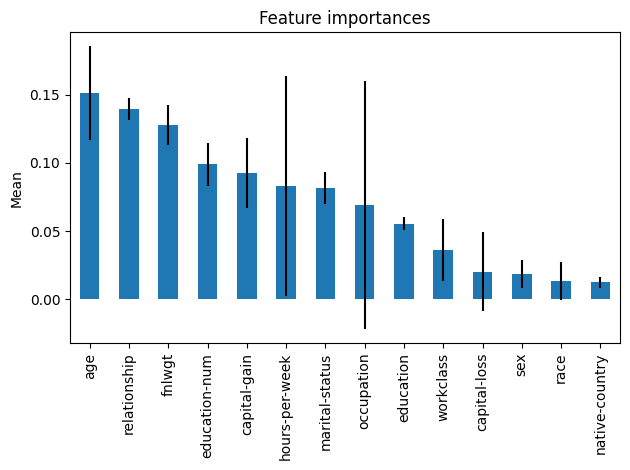

In [17]:
import pandas as pd

forest_importances = pd.Series(bardata)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean")
fig.tight_layout()

GaussianNB()

SVC()

RandomForestClassifier(random_state=23721266)

Naive Bayes
auc: 0.5935093699079741
f1: 0.33469387755102037
accuracy: 0.7627796980171002
sensitivity: 0.2166446499339498
specificity: 0.9703740898819985
precision: 0.7354260089686099


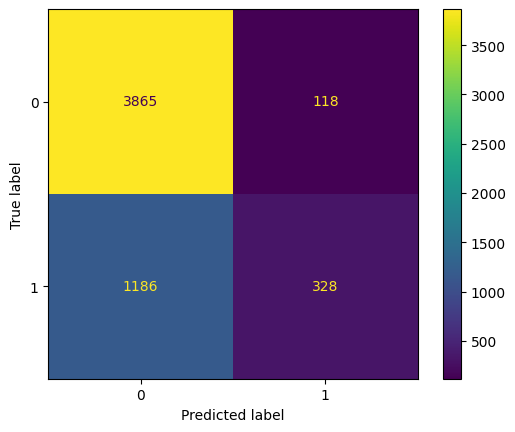

SVM
auc: 0.758376170056956
f1: 0.6603360116873631
accuracy: 0.8308168091686374
sensitivity: 0.5970937912813739
specificity: 0.9196585488325383
precision: 0.738562091503268


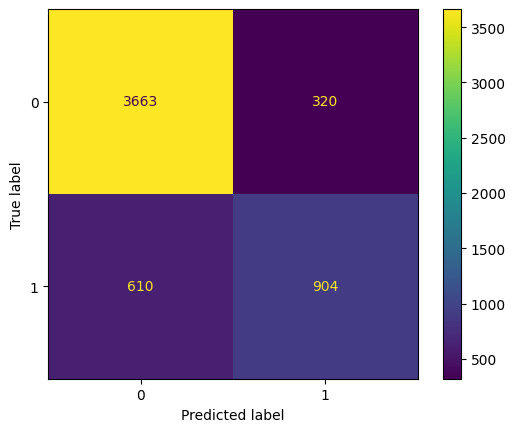

Random forest
auc: 0.7735832207622156
f1: 0.6755102040816326
accuracy: 0.8264507913407313
sensitivity: 0.6558784676354029
specificity: 0.8912879738890284
precision: 0.6963534361851332


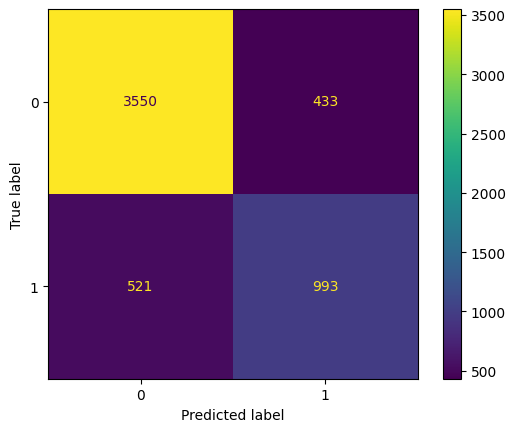

In [32]:
#part 5 (2)

def getTopFeatures(num,dictt):
    temp = dict(sorted(dictt.items(), key=lambda item: item[1],reverse= True))
    for i in range(len(dictt)-num):
         temp.popitem()
    return temp  

GNB5 = GaussianNB()
SVM5 = svm.SVC()
RF5 = RandomForestClassifier(random_state=23721266)
   
Top6Features = getTopFeatures(6,toDict(importances,Xfeature_selection.columns))

X6Features = Ftraining[Top6Features.keys()]
Y6Features = Ftraining['annual-income']
#standardized 
std_Ftraining = myStd(Ftraining)
std_X6Features = std_Ftraining[Top6Features.keys()]
std_Y6Features = std_Ftraining['annual-income']

GNB5.fit(X6Features,Y6Features)
SVM5.fit(std_X6Features,std_Y6Features)
RF5.fit(X6Features,Y6Features)

X_valid_6 = X_valid[Top6Features.keys()]
#standardized
std_X_valid_6 = std_X_valid[Top6Features.keys()]

GNB5_Y_pred_valid = GNB5.predict(X_valid_6)
SVM5_Y_pred_valid = SVM5.predict(std_X_valid_6)
RF5_Y_pred_valid = RF5.predict(X_valid_6)

RF5_validP1 = p1_metrics(Y_valid,GNB5_Y_pred_valid)
outputP1_metrics(RF5_validP1,"Naive Bayes")

SVM5_validP1 = p1_metrics(std_Y_valid,SVM5_Y_pred_valid)
outputP1_metrics(SVM5_validP1,"SVM")

RF5_validP1 = p1_metrics(Y_valid,RF5_Y_pred_valid)
outputP1_metrics(RF5_validP1,"Random forest")



GaussianNB()

SVC()

RandomForestClassifier(random_state=23721266)

Naive Bayes
auc: 0.6375158326454141
f1: 0.44576116681859623
accuracy: 0.778788430052756
sensitivity: 0.3229854689564069
specificity: 0.9520461963344213
precision: 0.7191176470588235


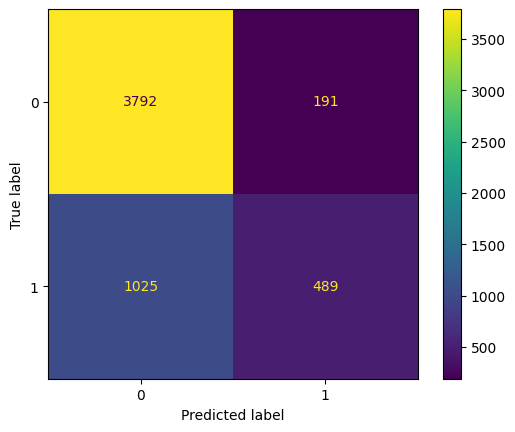

SVM
auc: 0.769479170225108
f1: 0.6765236206274793
accuracy: 0.8368200836820083
sensitivity: 0.619550858652576
specificity: 0.91940748179764
precision: 0.7450357426528992


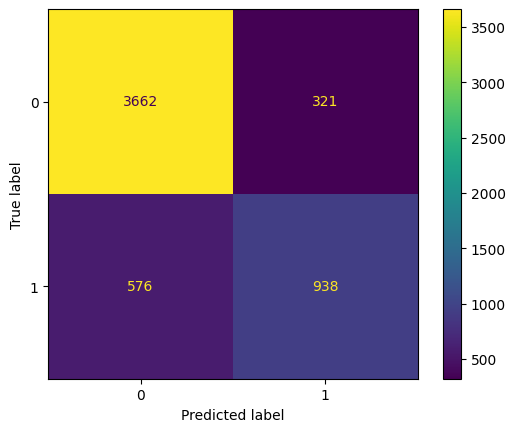

Random forest
auc: 0.7926624083663364
f1: 0.7084354217710885
accuracy: 0.8484627978897581
sensitivity: 0.6684280052840158
specificity: 0.9168968114486568
precision: 0.7535368577810871


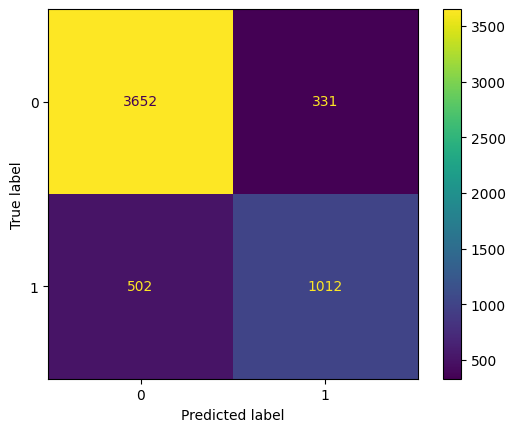

In [35]:
#part 5 (3)
GNB11 = GaussianNB()
SVM11 = svm.SVC()
RF11 = RandomForestClassifier(random_state=23721266)

Top11Features = getTopFeatures(11,toDict(importances,Xfeature_selection.columns))
X11Features = Ftraining[Top11Features.keys()]
Y11Features = Ftraining['annual-income']

#standardized 
std_X11Features = std_Ftraining[Top11Features.keys()]
std_Y11Features = std_Ftraining['annual-income']

GNB11.fit(X11Features,Y11Features)
SVM11.fit(std_X11Features,std_Y11Features)
RF11.fit(X11Features,Y11Features)

X_valid_11 = X_valid[Top11Features.keys()]
#standardized 
std_X_valid_11 = std_X_valid[Top11Features.keys()]

GNB11_Y_pred_valid = GNB11.predict(X_valid_11)
SVM11_Y_pred_valid = SVM11.predict(std_X_valid_11)
RF11_Y_pred_valid = RF11.predict(X_valid_11)

RF11_validP1 = p1_metrics(Y_valid,GNB11_Y_pred_valid)
outputP1_metrics(RF11_validP1,"Naive Bayes")

SVM11_validP1 = p1_metrics(std_Y_valid,SVM11_Y_pred_valid)
outputP1_metrics(SVM11_validP1,"SVM")

RF11_validP1 = p1_metrics(Y_valid,RF11_Y_pred_valid)
outputP1_metrics(RF11_validP1,"Random forest")


In [36]:
#6(1)
gnb_final = GaussianNB() 
svm_final = svm.SVC(probability=True) 
rf_final = RandomForestClassifier(random_state=23721266)

FTVset = pd.concat([feature_selection, Ftraining, valid_set])
XFTVset = FTVset.drop('annual-income',axis=1)
YFTVset = FTVset['annual-income']

#standardized data set
Std_FTVset = myStd(FTVset)
Std_XFTVset = Std_FTVset.drop('annual-income',axis=1)
Std_YFTVset = Std_FTVset['annual-income']



gnb_final.fit(XFTVset,YFTVset)
svm_final.fit(Std_XFTVset,Std_YFTVset)
rf_final.fit(XFTVset,YFTVset)

Final_gnb_Y_pred_test = gnb_final.predict(X_test) 
Final_svm_Y_pred_test = svm_final.predict(std_X_test) 
Final_rf_Y_pred_test = rf_final.predict(X_test) 

accuracy_score(Y_test,Final_gnb_Y_pred_test)
accuracy_score(std_Y_test,Final_svm_Y_pred_test)
accuracy_score(Y_test,Final_rf_Y_pred_test)


GaussianNB()

SVC(probability=True)

RandomForestClassifier(random_state=23721266)

0.7603711790393013

0.8389737991266376

0.8538937409024745

C:\Users\roy12\AppData\Local\Temp\ipykernel_8416\773995620.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,fontdict ={'fontsize':8})


[Text(0.0, 0, 'auc_mean'),
 Text(0.2, 0, 'auc_std'),
 Text(0.4, 0, 'f1_mean'),
 Text(0.6000000000000001, 0, 'f1_std'),
 Text(0.8, 0, 'accuracy_mean'),
 Text(1.0, 0, 'accuracy_std')]

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

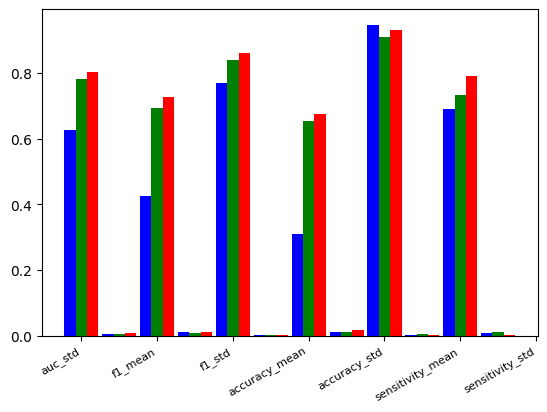

In [26]:
#part 6(2)
fig, ax = plt.subplots()
fig.autofmt_xdate()
w = 0.3
ax = plt.subplot(111)

#NB model 
x,y = zip(*collate_cv_results(pd.json_normalize(NBscores),display=False).items())
ind = np.arange(len(x))
ax.set_xticklabels(x,fontdict ={'fontsize':8})

#SVM part 3
Sx,Sy = zip(*collate_ht_results(clf,display=False).items())

#RF part 4
Rx,Ry = zip(*collate_ht_results(Rclf,display=False).items())


ax.bar(ind -w, y, width=w, color='b', align='center')
ax.bar(ind , Sy, width=w, color='g', align='center')
ax.bar(ind+w , Ry, width=w, color='r', align='center')


#plt.bar(x,y)
#plt.bar(Sx,Sy)
plt.show()

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

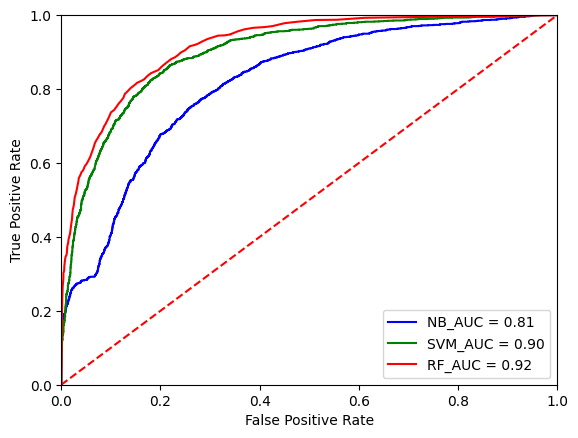

In [28]:
#part 6(3)
from sklearn.metrics import roc_curve, auc

#Get probability
pred_gnb_final_prob = gnb_final.predict_proba(X_test)[:,1]
pred_svm_final_prob = svm_final.predict_proba(std_X_test)[:,1]
pred_rf_final_prob = rf_final.predict_proba(X_test)[:,1]


fpr, tpr, threshold = roc_curve(Y_test,pred_gnb_final_prob)
roc_auc = auc(fpr, tpr)

svm_fpr, svm_tpr, svm_threshold = roc_curve(std_Y_test,pred_svm_final_prob)
svm_roc_auc = auc(svm_fpr, svm_tpr)

rf_fpr, rf_tpr, rf_threshold = roc_curve(Y_test,pred_rf_final_prob)
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.plot(fpr, tpr, 'b', label = 'NB_AUC = %0.2f' % roc_auc)
plt.plot(svm_fpr, svm_tpr, 'g', label = 'SVM_AUC = %0.2f' % svm_roc_auc)
plt.plot(rf_fpr, rf_tpr, 'r', label = 'RF_AUC = %0.2f' % rf_roc_auc)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()